In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [4]:
training_data[0][0].shape

torch.Size([1, 28, 28])

In [5]:
training_data[0][0].squeeze().shape

torch.Size([28, 28])

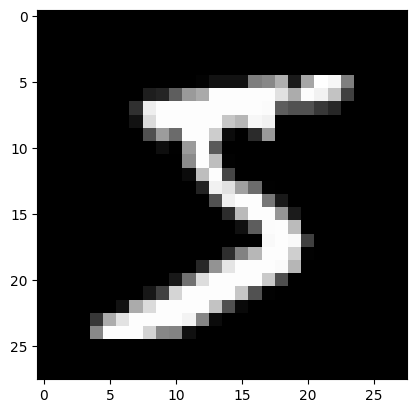

In [6]:
plt.imshow(training_data[0][0].squeeze(), cmap="gray");

In [7]:
training_data[0][1]

5

In [8]:
len(training_data)

60000

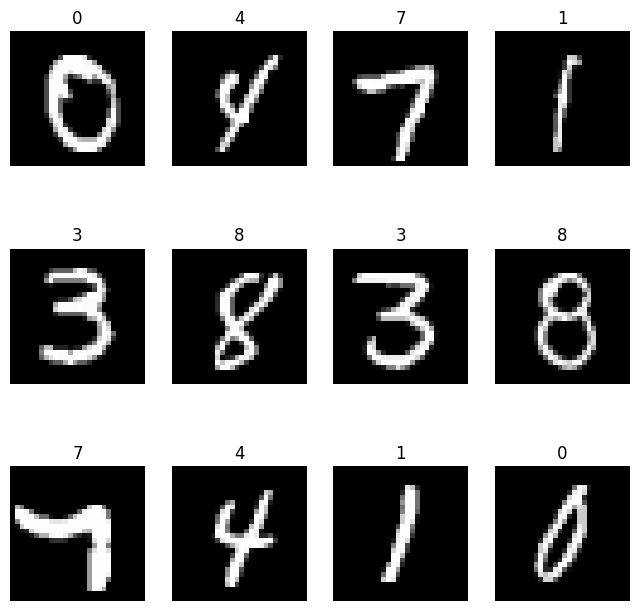

In [9]:
figure = plt.figure(figsize=(8,8))
cols, rows = 4, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [10]:
train_dataloader = DataLoader(training_data, batch_size=10)
test_dataloader = DataLoader(test_data, batch_size=10)

In [11]:
len(test_dataloader)

1000

In [12]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [13]:
model = NeuralNetwork().to(device)
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [14]:
lr = 0.01
bs = 10
epochs = 5

In [15]:
loss_fn = nn.CrossEntropyLoss()

In [16]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [17]:
def train_data(model):
    for xb, yb in train_dataloader:
        preds = model(xb)
        loss = loss_fn(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss = loss.item()
    print(f"Train loss: {loss:>7f}")

In [18]:
def test_data(model):
    num_batches = len(test_dataloader)
    size = len(test_dataloader.dataset)
    test_loss, corrects = 0, 0

    with torch.no_grad():
        for xb, yb in test_dataloader:
            preds = model(xb)
            test_loss += loss_fn(preds, yb).item()
            corrects += (preds.argmax(1) == yb).type(torch.float).sum().item()
    
    test_loss /= num_batches
    # test_loss = lo
    corrects /= size
    print(f"Test loss: \n Accuracy: {(100*corrects):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [19]:
for t in range(epochs):
    train_data(model)
    test_data(model)

Train loss: 0.087174
Test loss: 
 Accuracy: 91.2%, Avg loss: 0.304331 

Train loss: 0.066872
Test loss: 
 Accuracy: 92.6%, Avg loss: 0.251704 

Train loss: 0.058566
Test loss: 
 Accuracy: 93.6%, Avg loss: 0.217627 

Train loss: 0.050796
Test loss: 
 Accuracy: 94.1%, Avg loss: 0.196280 

Train loss: 0.044833
Test loss: 
 Accuracy: 94.7%, Avg loss: 0.180823 

